In [12]:
import numpy as np
from grand import grand_add_path_data
import os
import matplotlib.pyplot as plt

In [14]:
import grand.sim.detector.rf_chain as grfc
freq_MHz = np.arange(30, 251, 1)
rfchain = grfc.RFChain_gaa()
#rfchain= grfc.RFChain(vga_gain=20)
rfchain.compute_for_freqs(freq_MHz)

In [20]:
#import grand.sim.detector.rf_chain2 as grfc
#freq_MHz = np.arange(30, 251, 1)
#rfchain= grfc.RFChain_gaa()
#rfchain.compute_for_freqs(freq_MHz)
longitude=np.arange(180,360+180,5)
lstaxis=(longitude-180)/15
freqs=np.arange(30,251,1)

In [21]:
RFchainNS = np.array(rfchain.get_tf()[0])
RFchainEW = np.array(rfchain.get_tf()[1])
RFchainZ = np.array(rfchain.get_tf()[2])

In [22]:
#plt.plot(freqs,abs(RFchainNS))

In [23]:
c=299792458
kB=1.38064852e-23
Z0=120*np.pi
dnu=1 #MHz
freqs=np.arange(30,251,dnu) #freqs lfmap
#path_antX = grand_add_path_data("detector/Light_GP300Antenna_SNarm_leff.npz")
#path_antY = grand_add_path_data("detector/Light_GP300Antenna_EWarm_leff.npz")
#path_antZ = grand_add_path_data("detector/Light_GP300Antenna_Zarm_leff.npz")
path_antX = grand_add_path_data("detector/Light_GP300Antenna_nec_Xarm_leff.npz")
path_antY = grand_add_path_data("detector/Light_GP300Antenna_nec_Yarm_leff.npz")
path_antZ = grand_add_path_data("detector/Light_GP300Antenna_nec_Zarm_leff.npz")
################################################################################
f_leffX = np.load(path_antX)
f_leffY = np.load(path_antY)
f_leffZ = np.load(path_antZ)
freqsleff = f_leffX["freq_mhz"]
################################################################################
leffthX = f_leffX["leff_theta"]   # Real + j Imag. shape (phi, theta, freq) (361, 91, 221)
leffphX = f_leffX["leff_phi"] # Real + j Imag. shape (phi, theta, freq)
leffthX = np.moveaxis(leffthX, -1, 0) # shape (phi, theta, freq) --> (freq, phi, theta)
leffphX = np.moveaxis(leffphX, -1, 0) # shape (phi, theta, freq) --> (freq, phi, theta)
################################################################################
leffthY = f_leffY["leff_theta"]   # Real + j Imag. shape (phi, theta, freq) (361, 91, 221)
leffphY = f_leffY["leff_phi"] # Real + j Imag. shape (phi, theta, freq)
leffthY = np.moveaxis(leffthY, -1, 0) # shape (phi, theta, freq) --> (freq, phi, theta)
leffphY = np.moveaxis(leffphY, -1, 0) # shape (phi, theta, freq) --> (freq, phi, theta)
################################################################################
leffthZ = f_leffZ["leff_theta"]   # Real + j Imag. shape (phi, theta, freq) (361, 91, 221)
leffphZ = f_leffZ["leff_phi"] # Real + j Imag. shape (phi, theta, freq)
leffthZ = np.moveaxis(leffthZ, -1, 0) # shape (phi, theta, freq) --> (freq, phi, theta)
leffphZ = np.moveaxis(leffphZ, -1, 0) # shape (phi, theta, freq) --> (freq, phi, theta)
################################################################################
theta = np.tile(np.arange(91, dtype=float), (221,361,1))
phi = np.arange(361, dtype=float)[:, np.newaxis]
phi = np.tile(phi, (221,1,91))
################################################################################
leffthX = np.abs(leffthX)
leffphX = np.abs(leffphX)
################################################################################
leffthY = np.abs(leffthY)
leffphY = np.abs(leffphY)
################################################################################
leffthZ = np.abs(leffthZ)
leffphZ = np.abs(leffphZ)
################################################################################
lefftX=np.zeros((len(freqsleff),361,181))
leffpX=np.zeros((len(freqsleff),361,181))
lefftY=np.zeros((len(freqsleff),361,181))
leffpY=np.zeros((len(freqsleff),361,181))
lefftZ=np.zeros((len(freqsleff),361,181))
leffpZ=np.zeros((len(freqsleff),361,181))
################################################################################
lefftX[:, :, :91] = leffthX
leffpX[:, :, :91] = leffphX
lefftY[:, :, :91] = leffthY
leffpY[:, :, :91] = leffphY
lefftZ[:, :, :91] = leffthZ
leffpZ[:, :, :91] = leffphZ
################################################################################
latitude=(90-40.98)*np.pi/180 #xinjiang, rad
#latitude=(90+36)*np.pi/180 # malargue
longitude=np.arange(180,360+180,5)
lstaxis=(longitude-180)/15
lon=longitude*np.pi/180 #rad
voc2X=np.zeros((len(freqs),len(lon))) #per MHz
voc2Y=np.zeros((len(freqs),len(lon))) #per MHz
voc2Z=np.zeros((len(freqs),len(lon))) #per MHz
######################################################
vout2X=np.zeros((len(freqs),len(lon))) #per MHz
vout2Y=np.zeros((len(freqs),len(lon))) #per MHz
vout2Z=np.zeros((len(freqs),len(lon))) #per MHz
######################################################
avleff2X=np.zeros(len(freqs))
avleff2Y=np.zeros(len(freqs))
avleff2Z=np.zeros(len(freqs))
avtemp=np.zeros(len(freqs))
avBnu=np.zeros(len(freqs))
avErms2=np.zeros(len(freqs))
################################################################################
dphi=5 #deg
dtheta=5 #deg
zenith,azimuth=np.meshgrid( np.arange(0,180,dtheta)*np.pi/180, np.arange(0,360,dphi)*np.pi/180 )#rad
nazimuth=72
nzenith=36
idselfreq=np.arange(0,len(freqsleff),dnu)
idseltheta=np.arange(0,181,dphi)
idselphi=np.arange(0,361,dtheta)
lefftX=lefftX[idselfreq,:,:][:,idselphi,:][:,:,idseltheta]
leffpX=leffpX[idselfreq,:,:][:,idselphi,:][:,:,idseltheta]
lefftY=lefftY[idselfreq,:,:][:,idselphi,:][:,:,idseltheta]
leffpY=leffpY[idselfreq,:,:][:,idselphi,:][:,:,idseltheta]
lefftZ=lefftZ[idselfreq,:,:][:,idselphi,:][:,:,idseltheta]
leffpZ=leffpZ[idselfreq,:,:][:,idselphi,:][:,:,idseltheta]
T=np.zeros((len(freqs),len(lon),72,36))
################################################################################

for f in range(len(freqs)):    

    #LFmapshort contains 72 phi each 5 degrees, from 5/2deg to (360+365)/2 deg, and 36 theta, from 5/2deg to (175+180)/2 deg

    ra,dec,temp=np.load(grand_add_path_data("noise/LFmap/LFmapshort"+str(freqs[f])+".npy")) #rad inside
    integ=0
    print(freqs[f])

    for l in range(len(lon)):
    
        omega=0
        for i in range(nazimuth):
            for j in range(nzenith):
                #(RzRy)-1
                coszenithp=(np.sin(latitude)*np.cos(lon[l])*np.sin(zenith[i,j])*np.cos(azimuth[i,j])+np.sin(latitude)*np.sin(lon[l])*np.sin(zenith[i,j])*np.sin(azimuth[i,j])+np.cos(zenith[i,j])*np.cos(latitude))
                zenithp=np.arccos(coszenithp)
                cosazimuthp=( np.cos(latitude)*np.cos(lon[l])*np.sin(zenith[i,j])*np.cos(azimuth[i,j]) +np.sin(lon[l])*np.cos(latitude)*np.sin(zenith[i,j])*np.sin(azimuth[i,j]) -np.sin(latitude)*np.cos(zenith[i,j]) ) / np.sin(zenithp)
                sinazimuthp=(-np.sin(lon[l])*np.sin(zenith[i,j])*np.cos(azimuth[i,j])+ np.cos(lon[l])*np.sin(zenith[i,j])*np.sin(azimuth[i,j])) / np.sin(zenithp)
                if zenithp==0:
                    print('zenithp=0')
                    print(zenith[i,j],azimuth[i,j])
                    print(zenithp,cosazimuthp,sinazimuthp)
                if cosazimuthp<-1.1 or cosazimuthp>1.1:
                    print('cos out of range')
                    print(zenith[i,j],azimuth[i,j])
                    print(zenithp,cosazimuthp,sinazimuthp)
        
                if sinazimuthp<0:
                    if cosazimuthp<-1:
                        azimuthp=2*np.pi-np.arccos(-1)
                    elif cosazimuthp>1:
                        azimuthp=2*np.pi-np.arccos(1)       
                    else:
                        azimuthp=2*np.pi-np.arccos(cosazimuthp)

                else:
                    if cosazimuthp<-1:
                        azimuthp=np.arccos(-1)
                    elif cosazimuthp>1:
                        azimuthp=np.arccos(1)    
                    else:
                        azimuthp=np.arccos(cosazimuthp)
                diffzenith=zenithp-zenith[i,j]
                diffazimuth=azimuthp-azimuth[i,j]

                ip=int(i+round(diffazimuth/(dphi*np.pi/180)))
                jp=int(j+round(diffzenith/(dtheta*np.pi/180)))
                
                contribX = (lefftX[f,ip,jp]**2+leffpX[f,ip,jp]**2)*temp[i,j]*np.sin(zenith[i,j]) 
                contribY = (lefftY[f,ip,jp]**2+leffpY[f,ip,jp]**2)*temp[i,j]*np.sin(zenith[i,j]) 
                contribZ = (lefftZ[f,ip,jp]**2+leffpZ[f,ip,jp]**2)*temp[i,j]*np.sin(zenith[i,j])  
                contribXX = abs(RFchainNS[f])*abs(RFchainNS[f])*(lefftX[f,ip,jp]**2+leffpX[f,ip,jp]**2)*temp[i,j]*np.sin(zenith[i,j]) 
                contribYY = abs(RFchainEW[f])*abs(RFchainEW[f])*(lefftY[f,ip,jp]**2+leffpY[f,ip,jp]**2)*temp[i,j]*np.sin(zenith[i,j]) 
                contribZZ = abs(RFchainZ[f])*abs(RFchainZ[f])*(lefftZ[f,ip,jp]**2+leffpZ[f,ip,jp]**2)*temp[i,j]*np.sin(zenith[i,j]) 
                
                #print(contrib)
                if contribX!=0:
                    T[f,l,i,j]=temp[i,j]
                #omega=omega+np.sin(zenith[i,j])
                voc2X[f,l]=voc2X[f,l] + contribX
                voc2Y[f,l]=voc2Y[f,l] + contribY
                voc2Z[f,l]=voc2Z[f,l] + contribZ
                
                vout2X[f,l]=vout2X[f,l] + contribXX
                vout2Y[f,l]=vout2Y[f,l] + contribYY
                vout2Z[f,l]=vout2Z[f,l] + contribZZ
                
                if l==0:
                    avleff2X[f]=avleff2X[f] + (lefftX[f,i,j]**2+leffpX[f,i,j]**2)*np.sin(zenith[i,j])
                    avleff2Y[f]=avleff2Y[f] + (lefftY[f,i,j]**2+leffpY[f,i,j]**2)*np.sin(zenith[i,j])
                    avleff2Z[f]=avleff2Z[f] + (lefftZ[f,i,j]**2+leffpZ[f,i,j]**2)*np.sin(zenith[i,j])
                    avtemp[f]=avtemp[f] + temp[i,j]*np.sin(zenith[i,j]) 
                    avBnu[f]=avBnu[f] + temp[i,j]*2*(freqs[f]*1e6)**2*kB/(c**2)*np.sin(zenith[i,j]) 
                    avErms2[f]=avErms2[f] + temp[i,j]*4*(np.pi)*Z0*(freqs[f]*1e6)**2*kB/(c**2)*np.sin(zenith[i,j]) 
                    #lon0Voc2[f]= lon0Voc2[f]+ (lefft[f,ip,jp]**2+leffp[f,ip,jp]**2)* Z0* temp[i,j] * (freqs[f]*1e6)**2 * kB/(c**2) *np.sin(zenith[i,j]) 
        
    voc2X[f,:]=voc2X[f,:]*(freqs[f]*1e6)**2
    voc2Y[f,:]=voc2Y[f,:]*(freqs[f]*1e6)**2
    voc2Z[f,:]=voc2Z[f,:]*(freqs[f]*1e6)**2
    vout2X[f,:]=vout2X[f,:]*(freqs[f]*1e6)**2
    vout2Y[f,:]=vout2Y[f,:]*(freqs[f]*1e6)**2
    vout2Z[f,:]=vout2Z[f,:]*(freqs[f]*1e6)**2
######################################################################
voc2X=voc2X*kB*Z0/(c**2)*dtheta*np.pi/180*dphi*np.pi/180 #per Hz
voc2Y=voc2Y*kB*Z0/(c**2)*dtheta*np.pi/180*dphi*np.pi/180 #per Hz
voc2Z=voc2Z*kB*Z0/(c**2)*dtheta*np.pi/180*dphi*np.pi/180 #per Hz

vout2X=vout2X*kB*Z0/(c**2)*dtheta*np.pi/180*dphi*np.pi/180 #per Hz
vout2Y=vout2Y*kB*Z0/(c**2)*dtheta*np.pi/180*dphi*np.pi/180 #per Hz
vout2Z=vout2Z*kB*Z0/(c**2)*dtheta*np.pi/180*dphi*np.pi/180 #per Hz

avleff2X=avleff2X*dtheta*np.pi/180*dphi*np.pi/180/(4*np.pi)
avleff2Y=avleff2Y*dtheta*np.pi/180*dphi*np.pi/180/(4*np.pi)
avleff2Z=avleff2Z*dtheta*np.pi/180*dphi*np.pi/180/(4*np.pi)
avtemp=avtemp*dtheta*np.pi/180*dphi*np.pi/180/(4*np.pi)
avBnu=avBnu*dtheta*np.pi/180*dphi*np.pi/180/(4*np.pi)
avErms2=avErms2*dtheta*np.pi/180*dphi*np.pi/180/(4*np.pi)

filename = grand_add_path_data("detector/RFchain_v2/Z_ant_3.2m.csv")
RLX,RLY,RLZ = np.loadtxt(filename, delimiter=",", usecols = (1,3,5), skiprows=1, unpack=True)
RLbisX=np.zeros((len(freqs),len(lon)))
RLbisY=np.zeros((len(freqs),len(lon)))
RLbisZ=np.zeros((len(freqs),len(lon)))
RLbisX=RLbisX.T
RLbisY=RLbisY.T
RLbisZ=RLbisZ.T
RLbisX[:]=RLX
RLbisY[:]=RLY
RLbisZ[:]=RLZ
RLbisX=RLbisX.T
RLbisY=RLbisY.T
RLbisZ=RLbisZ.T
plX=voc2X/(4*RLbisX)
plY=voc2Y/(4*RLbisY)
plZ=voc2Z/(4*RLbisZ)

30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250


In [24]:
np.save("galactic_Vout2_per_Hz_gp13_gaaTF.npy", np.stack([vout2X, vout2Y, vout2Z], axis=-1))

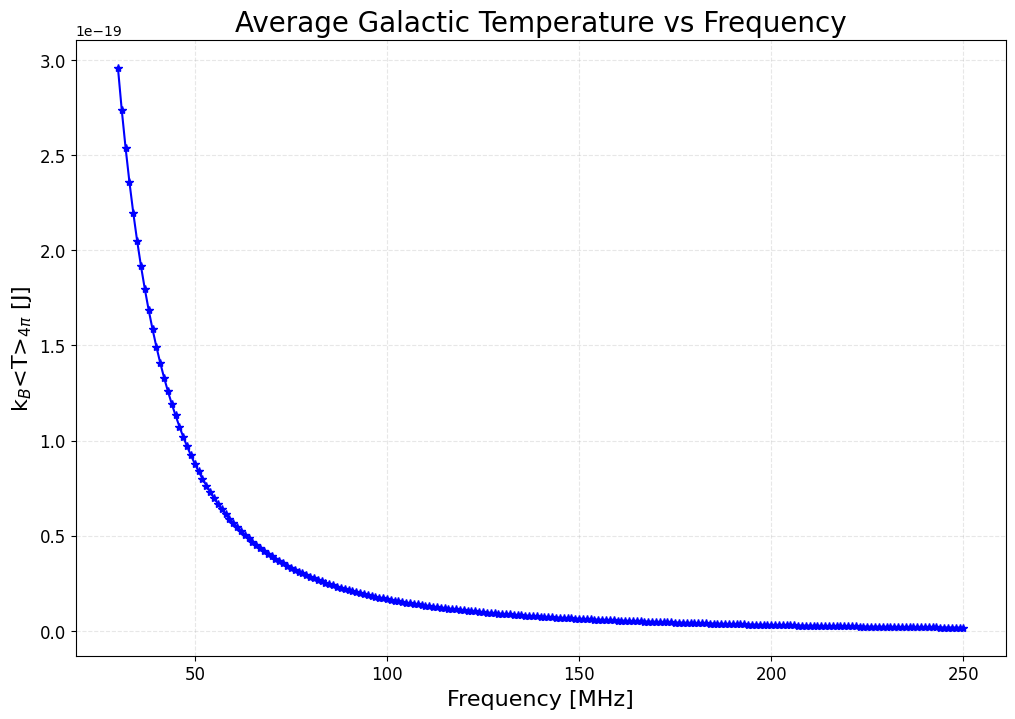

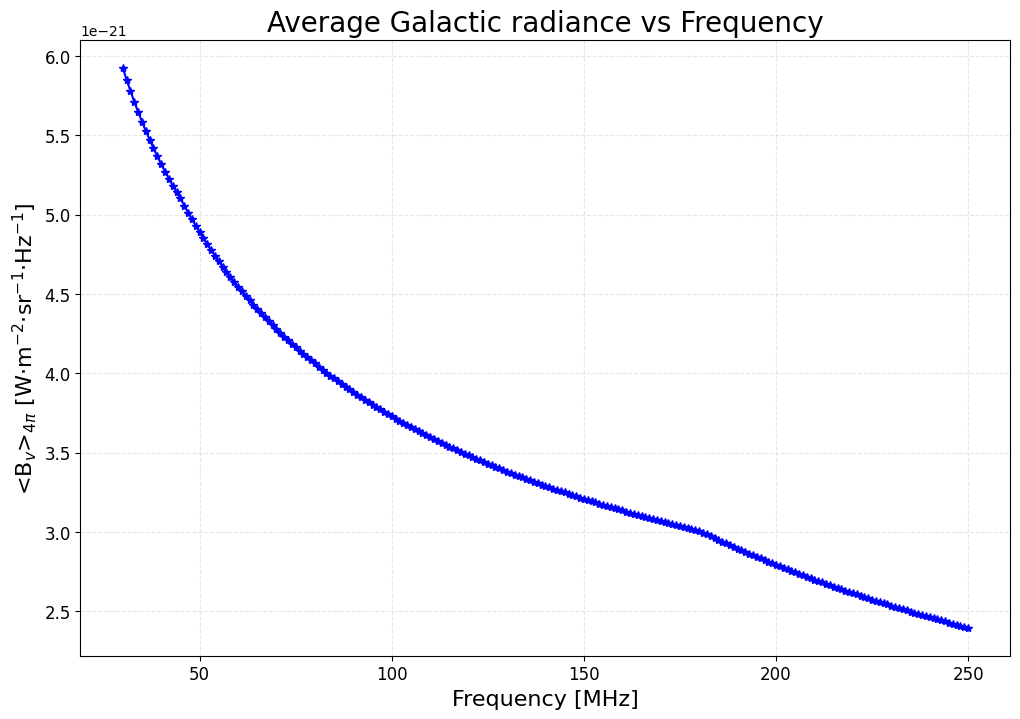

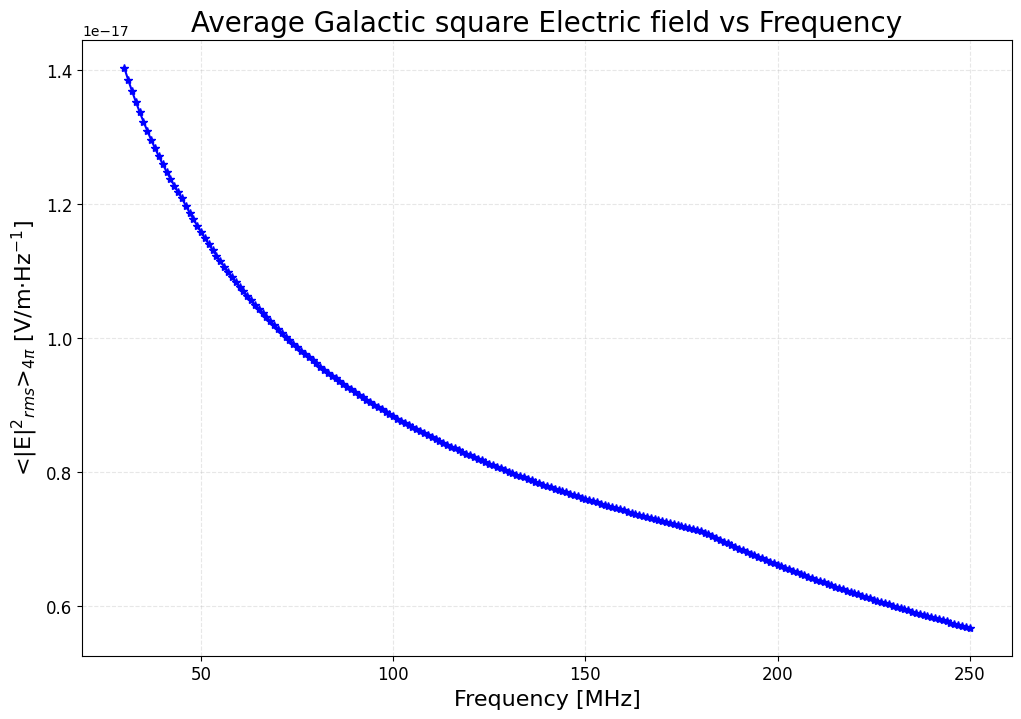

In [69]:
plt.figure(figsize=(12, 8))
plt.title('Average Galactic Temperature vs Frequency',fontsize=20)
plt.plot(freqs,avtemp*kB,'-*',color='b')
plt.grid(ls='--', alpha=0.3)
plt.xlabel('Frequency [MHz]',fontsize=16)
plt.ylabel('k$_B$<T>$_{4\pi}$ [J]',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

plt.figure(figsize=(12, 8))
plt.title('Average Galactic radiance vs Frequency',fontsize=20)
plt.plot(freqs,avBnu,'-*',color='b')
plt.grid(ls='--', alpha=0.3)
plt.xlabel('Frequency [MHz]',fontsize=16)
plt.ylabel('<B$_{v}$>$_{4\pi}$ [W$\cdot$m$^{-2}$$\cdot$sr$^{-1}$$\cdot$Hz$^{-1}$]',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

plt.figure(figsize=(12, 8))
plt.title('Average Galactic square Electric field vs Frequency',fontsize=20)
plt.plot(freqs,avErms2,'-*',color='b')
plt.grid(ls='--', alpha=0.3)
plt.xlabel('Frequency [MHz]',fontsize=16)
plt.ylabel('<|E|$^{2}$$_{rms}$>$_{4\pi}$ [V/m$\cdot$Hz$^{-1}$]',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

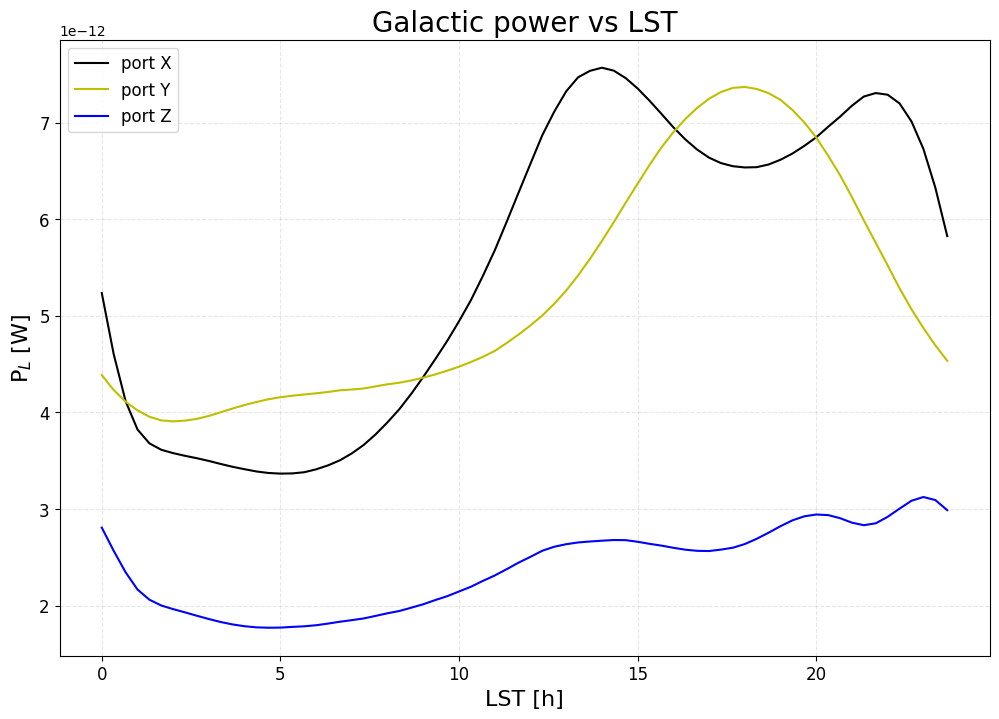

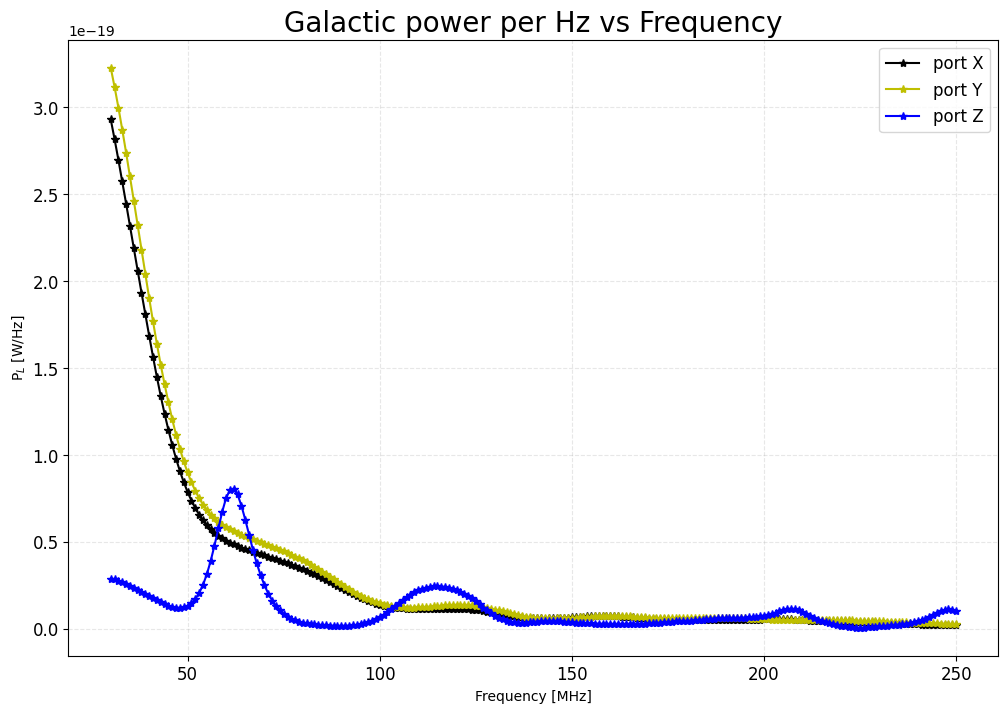

In [29]:
plt.figure(figsize=(12, 8))
plt.title('Galactic power vs LST',fontsize=20)
plt.plot(lstaxis,np.sum(plX,0)*dnu*1e6,'k')
plt.plot(lstaxis,np.sum(plY,0)*dnu*1e6,'y')
plt.plot(lstaxis,np.sum(plZ,0)*dnu*1e6,'b')
plt.grid(ls='--', alpha=0.3)
plt.xlabel('LST [h]',fontsize=16)
plt.ylabel('P$_L$ [W]',fontsize=16)
plt.legend(["port X", "port Y", "port Z"], loc="best",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

lst=18
plt.figure(figsize=(12, 8))
plt.title('Galactic power per Hz vs Frequency',fontsize=20)
plt.plot(freqs,plX[:,lstaxis==lst],'-*',color='k')
plt.plot(freqs,plY[:,lstaxis==lst],'-*',color='y')
plt.plot(freqs,plZ[:,lstaxis==lst],'-*',color='b')
plt.grid(ls='--', alpha=0.3)
plt.legend(["port X", "port Y", "port Z"], loc="best",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Frequency [MHz]')
plt.ylabel('P$_L$ [W/Hz]')
plt.show()